**Exercise 6 - Parts D: Transfer Learning Using VGG16 Model**


In [ ]:
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
from imutils import paths
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Neural_Networks/6

# Four classes
classes = ['sunrise', 'rain', 'cloudy', 'shine']

# Train and test directories
train_data_dir = r'./data/train'
test_data_dir = r'./data/test'

**Data Generator - With Augmentation**

In [ ]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# The test data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        class_mode='categorical')

# Flow validation images in batches of 32 using val_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 900 images belonging to 4 classes.
Found 226 images belonging to 4 classes.


**CNN Model - VGG16**

In [ ]:
# load model
model = VGG16(include_top=False, input_shape=(150, 150, 3))

# mark loaded layers as not trainable
for layer in model.layers:
  layer.trainable = False

# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(len(classes), activation='softmax')(class1)  # the output of the softmax function can be used to represent a categorical distribution

# define new model
model = Model(inputs=model.inputs, outputs=output)

**Compile and Fit**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # use categorical loss function

history = model.fit(
      train_generator,
      batch_size=32,
      steps_per_epoch=len(train_generator),
      epochs=15,
      validation_data=test_generator,
      verbose=2)

Epoch 1/15
29/29 - 16s - loss: 1.0291 - accuracy: 0.6144 - val_loss: 0.4437 - val_accuracy: 0.8274 - 16s/epoch - 548ms/step
Epoch 2/15
29/29 - 14s - loss: 0.4733 - accuracy: 0.8244 - val_loss: 0.2739 - val_accuracy: 0.9159 - 14s/epoch - 472ms/step
Epoch 3/15
29/29 - 12s - loss: 0.4073 - accuracy: 0.8411 - val_loss: 0.2807 - val_accuracy: 0.9159 - 12s/epoch - 425ms/step
Epoch 4/15
29/29 - 12s - loss: 0.3678 - accuracy: 0.8689 - val_loss: 0.2319 - val_accuracy: 0.9204 - 12s/epoch - 425ms/step
Epoch 5/15
29/29 - 12s - loss: 0.3111 - accuracy: 0.8889 - val_loss: 0.2200 - val_accuracy: 0.9336 - 12s/epoch - 428ms/step
Epoch 6/15
29/29 - 12s - loss: 0.3149 - accuracy: 0.8900 - val_loss: 0.1856 - val_accuracy: 0.9336 - 12s/epoch - 427ms/step
Epoch 7/15
29/29 - 12s - loss: 0.2977 - accuracy: 0.9022 - val_loss: 0.1560 - val_accuracy: 0.9602 - 12s/epoch - 424ms/step
Epoch 8/15
29/29 - 13s - loss: 0.2508 - accuracy: 0.9111 - val_loss: 0.1637 - val_accuracy: 0.9513 - 13s/epoch - 438ms/step
Epoch 9/

**Evaluation**

In [ ]:
def evaluation(history):

  # Print accuracy
  print(('\033[1m' + 'Accuracy: ' + '\033[35m' + '{:.3f}' + '\033[44m' + '\033[0m' + '\n').format(history.history['val_accuracy'][-1]))  # The last value is the final accuracy

  # Plot training and test loss
  fig, ax = plt.subplots()
  ax.plot(history.history["loss"], 'steelblue', label = "Train Loss")
  ax.plot(history.history["val_loss"], 'rosybrown', label = "Test Loss")
  fig.suptitle('Training and Test Loss', fontsize=16)
  ax.legend()

  # Plot training and test accuracy
  fig, ax = plt.subplots()
  ax.plot(history.history['accuracy'], 'steelblue', label = "Train Accuracy")
  ax.plot(history.history['val_accuracy'],  'rosybrown', label = "Test Accuracy")
  fig.suptitle('Training and Test Accuracy', fontsize=16)
  ax.legend()

Accuracy: 0.960



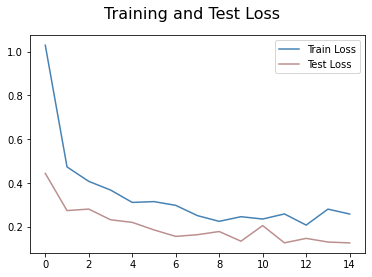

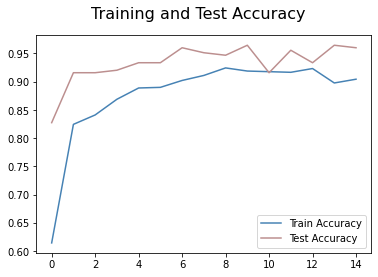

In [ ]:
evaluation(history)

**Prediction**

In [ ]:
def predict(img_path):

    # Loads an image
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)  # (height, width, channels)
    
    #Plotting the image
    plt.imshow(img_tensor/255)
    plt.show()

    img_tensor = np.expand_dims(img_tensor, axis=0)  # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.
    
    # Creating a dictionary of classes as the predict function gives probablities
    actualClasses = { 0:'Cloudy',1:'Rain',2:'Shine',3:'Sunrise' }

    # Prediction
    pred = model.predict(img_tensor)
    classes = np.argmax(pred)
    return 'Predicted Class for the input image : {}'.format(actualClasses[classes])

Here, we try new images that were not in the original dataset!

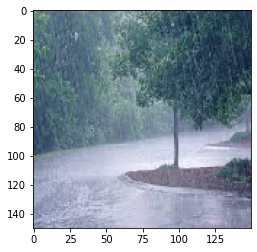

Predicted Class for the input image : Rain



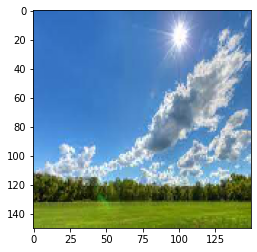

Predicted Class for the input image : Shine



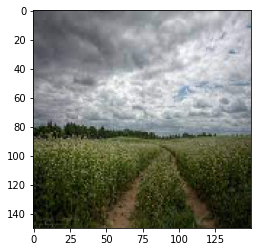

Predicted Class for the input image : Cloudy



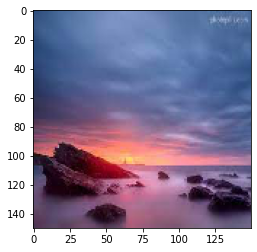

Predicted Class for the input image : Sunrise



In [ ]:
print(predict("./new_images/rainy.jpg") + '\n')
print(predict("./new_images/shine.jpg") + '\n')
print(predict("./new_images/cloudy.jpg") + '\n')
print(predict("./new_images/sunrise.jpg") + '\n')

**The presictions are correct!**